$$\newcommand{\xv}{\mathbf{x}}
\newcommand{\Xv}{\mathbf{X}}
\newcommand{\yv}{\mathbf{y}}
\newcommand{\Yv}{\mathbf{Y}}
\newcommand{\zv}{\mathbf{z}}
\newcommand{\av}{\mathbf{a}}
\newcommand{\Wv}{\mathbf{W}}
\newcommand{\wv}{\mathbf{w}}
\newcommand{\betav}{\mathbf{\beta}}
\newcommand{\gv}{\mathbf{g}}
\newcommand{\Hv}{\mathbf{H}}
\newcommand{\dv}{\mathbf{d}}
\newcommand{\Vv}{\mathbf{V}}
\newcommand{\vv}{\mathbf{v}}
\newcommand{\tv}{\mathbf{t}}
\newcommand{\Tv}{\mathbf{T}}
\newcommand{\Sv}{\mathbf{S}}
\newcommand{\Gv}{\mathbf{G}}
\newcommand{\zv}{\mathbf{z}}
\newcommand{\Zv}{\mathbf{Z}}
\newcommand{\Norm}{\mathcal{N}}
\newcommand{\muv}{\boldsymbol{\mu}}
\newcommand{\sigmav}{\boldsymbol{\sigma}}
\newcommand{\phiv}{\boldsymbol{\phi}}
\newcommand{\Phiv}{\boldsymbol{\Phi}}
\newcommand{\Sigmav}{\boldsymbol{\Sigma}}
\newcommand{\Lambdav}{\boldsymbol{\Lambda}}
\newcommand{\half}{\frac{1}{2}}
\newcommand{\argmax}[1]{\underset{#1}{\operatorname{argmax}}}
\newcommand{\argmin}[1]{\underset{#1}{\operatorname{argmin}}}
\newcommand{\dimensionbar}[1]{\underset{#1}{\operatorname{|}}}
\newcommand{\dimensionbar}[1]{\underset{#1}{\operatorname{|}}}
\newcommand{\grad}{\mathbf{\nabla}}
\newcommand{\ebx}[1]{e^{\betav_{#1}^T \xv_n}}
\newcommand{\eby}[1]{e^{y_{n,#1}}}
\newcommand{\Tiv}{\mathbf{Ti}}
\newcommand{\Fv}{\mathbf{F}}
\newcommand{\ones}[1]{\mathbf{1}_{#1}}
$$

# Assignment 4: Classification with LDA and Logistic Regression

*Zhixian (Jason) Yu*

## Overview

**Objective:**  To compare LDA and linear and nonlinear logistic regression applied to two classification problems.

**Data source:** <br />
1.Abalone Dataset: http://archive.ics.uci.edu/ml/datasets/Abalone<br />
2.Cardiocotograms Dataset: http://archive.ics.uci.edu/ml/machine-learning-databases/00193/CTG.xls 

## Methods
### Linear Discriminant Analysis:
In LDA, we assume the same covariance matrix, $\Sigmav$, for each class, where 
$$
\begin{align*}
\Sigmav = \sum_{k=1}^K \frac{N_k}{N} \Sigmav_k,
\end{align*}
$$
Therefore the discriminant function becomes
$$
      \begin{align*}
        \delta_k(\xv) = \xv^T \Sigmav^{-1} \muv_k - \frac{1}{2}\muv_k^T \Sigmav^{-1} \muv_k + \log
        P(C=k)
      \end{align*}
$$
### Linear Logistic Regression:
In LLR, we want to find $\wv$ that maximizes the data likelihood, given the likelihood:

$$
    \begin{align*}
      L(\wv) & = \prod_{n=1}^N \prod_{k=1}^K p(C=k\,|\, \xv_n) ^ {t_{n,k}}
    \end{align*}
$$

For derivation simplicity, we work with the natural logarithm  $\log L(\wv)$ which we will call $LL(\wv)$.

$$
    \begin{align*}
      LL(\wv) = \log L(\wv) = \sum_{n=1}^N \sum_{k=1}^K t_{n,k}  \log p(C=k\,|\,\xv_n)
    \end{align*}
$$

And we use gradient ascent to update and find optimal $\wv$ to maximize the likelihood:

$$
    \begin{align*}
        \wv_j  \leftarrow \wv_j + \alpha \sum_{n=1}^N
        (t_{n,j} - g_j(\xv_n)) \xv_n
        \end{align*}
$$
### Non-linear logistic regresion:
Here are the expressions
we used for minimizing mean squared error:

$$
      \begin{align*}
        \Zv &= h(\tilde{\Xv} \Vv)\\
        \Yv &= \tilde{\Zv} \Wv\\
        E &= \frac{1}{NK} \frac{1}{2} \sum (\Tv - \Yv)^2\\
        \grad_\Vv E &=  - \frac{1}{NK}  \tilde{\Xv}^T \left ( (\Tv - \Yv) \hat{\Wv}^T \cdot  (1-\Zv^2) \right )\\
        \grad_\Wv E &=  - \frac{1}{NK} \tilde{\Zv}^T (\Tv - \Yv)
      \end{align*}
$$


Here are the changes needed for nonlinear logistic regression. $\Tiv$
is indicator variables for  $\Tv$  

$$
      \begin{align*}
        \Zv &= h(\tilde{\Xv} \Vv)\\
        \Yv &= \tilde{\Zv} \Wv\\
        \Fv &= e^{\Yv}\\
        \Sv &= \Fv \ones{K}\;\;\;\;\;\;\;\;\;\;\;\;\; \text{ sum across columns}\\
        \Gv &= \Fv / \left [ \Sv, \Sv,\ldots,\Sv \right ] \;\;\; \Sv \text{ are column vectors }\\
        LL &=  \sum \Tiv \log \Gv\\
        \grad_\Vv LL &=    \tilde{\Xv}^T \left ( (\Tiv - \Gv) \hat{\Wv}^T \cdot  (1-\Zv^2) \right )\\
        \grad_\Wv LL &=   \tilde{\Zv}^T (\Tiv - \Gv)
      \end{align*}
$$

## Classes and Functions

In [2]:
import numpy as np
import mlutils as ml
import neuralnetworks as nn
import sys
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
### LDA class implementation from class
import sys # for sys.float_info.epsilon

######################################################################
### class QDA
######################################################################

class QDA(object):
    
    def __init__(self):
        # Define all instance variables here. Not necessary
        self.means = None
        self.stds = None
        self.mu = None
        self.sigma = None
        self.sigmaInv = None
        self.prior = None
        self.determinant = None
        self.discriminantConstant = None

    def train(self, X, T):
        self.classes = np.unique(T)
        self.means, self.stds = np.mean(X,0), np.std(X,0)
        Xs = (X - self.means) / self.stds
        self.mu = []
        self.sigma = []
        self.sigmaInv = []
        self.determinant = []
        self.prior = []
        nSamples = X.shape[0]
        for k in self.classes:
            rowsThisClass = (T == k).reshape((-1))
            #if k== 2: print('---',sum(rowsThisClass),'---')
            self.mu.append( np.mean(Xs[rowsThisClass, :], 0).reshape((-1,1)) )
            self.sigma.append( np.cov(Xs[rowsThisClass, :], rowvar=0) )
            if self.sigma[-1].size == 1:
                self.sigma[-1] = self.sigma[-1].reshape((1,1))
            det = np.linalg.det(self.sigma[-1])
            if det == 0:
                det = sys.float_info.epsilon
            self.determinant.append( det )
            self.sigmaInv.append( np.linalg.pinv(self.sigma[-1]) )    # pinv in case Sigma is singular
            self.prior.append( np.sum(rowsThisClass) / float(nSamples) )
        self._finishTrain()

    def _finishTrain(self):
        self.discriminantConstant = []
        for ki in range(len(self.classes)):
            self.discriminantConstant.append( np.log(self.prior[ki]) - 0.5*np.log(self.determinant[ki]) )

    def use(self,X):
        nSamples = X.shape[0]
        Xs = (X - self.means) / self.stds
        discriminants,probabilities = self._discriminantFunction(Xs)
        predictedClass = self.classes[np.argmax( discriminants, axis=1 )]
        predictedClass = predictedClass.reshape((-1, 1))
        return predictedClass, probabilities, discriminants

    def _discriminantFunction(self, Xs):
        nSamples = Xs.shape[0]
        discriminants = np.zeros((nSamples, len(self.classes)))
        for ki in range(len(self.classes)):
            Xc = Xs - self.mu[ki]
            discriminants[:,ki:ki+1] = self.discriminantConstant[ki] - 0.5 * \
                                       np.sum(np.dot(Xc, self.sigmaInv[ki]) * Xc, axis=1).reshape((-1,1))
        D = Xs.shape[1]
        probabilities = np.exp( discriminants - 0.5*D*np.log(2*np.pi) )
        return discriminants, probabilities
        
    def __repr__(self):
        if self.mu is None:
            return 'QDA not trained.'
        else:
            return 'QDA trained for classes {}'.format(self.classes)

######################################################################
### class LDA
######################################################################

class LDA(QDA):

    def _finishTrain(self):
        #print(self.classes)
        #print(self.sigma[0].shape)
        self.sigmaMean = np.sum(np.stack(self.sigma) * np.array(self.prior)[:,np.newaxis,np.newaxis], axis=0)
        self.sigmaMeanInv = np.linalg.pinv(self.sigmaMean)
        # print(self.sigma)
        # print(self.sigmaMean)
        self.discriminantConstant = []
        self.discriminantCoefficient = []
        for ki in range(len(self.classes)):
            sigmaMu = np.dot(self.sigmaMeanInv, self.mu[ki])
            self.discriminantConstant.append( -0.5 * np.dot(self.mu[ki].T, sigmaMu) )
            self.discriminantCoefficient.append( sigmaMu )
    
    def _discriminantFunction(self,Xs):
        nSamples = Xs.shape[0]
        discriminants = np.zeros((nSamples, len(self.classes)))
        for ki in range(len(self.classes)):
            discriminants[:,ki:ki+1] = self.discriminantConstant[ki] + \
                                       np.dot(Xs, self.discriminantCoefficient[ki])
        D = Xs.shape[1]
        probabilities = np.exp( discriminants - 0.5*D*np.log(2*np.pi) - 0.5*np.log(self.determinant[ki]) \
                               - 0.5*np.sum(np.dot(Xs,self.sigmaMeanInv) * Xs, axis=1).reshape((-1,1)))
        return discriminants, probabilities

In [4]:
def trainLDA(X, T, parameters = None):
    '''
    This function trains LDA with input data X and classifier T. 
    The member function train() calculates mean (mu) for each output class.
    For LDA, the covariance (cov) for each output class is considered the same.
    The final cov is calculated by weighting the cov of each class with its respective prior probability. 
    '''
    lda = LDA()
    lda.train(X, T)
    return lda

In [5]:
def evaluateLDA(model, X, T):
    '''
    This function uses trained LDA to determine the percentage of correct classfication.
    '''
    c, _ , _ = model.use(X)
    return (float(np.sum(T == c)) / len(c))*100

In [6]:
def trainNN(X, T, parameters):
    '''
    This function trains a logistic regression model for classification with input data X and classifier T. 
    Parameters specify whether it is a linear model or non-linear (neural network).
    If 0 hidden layers are specified, it is a linear logistic regression model; otherwise it uses neural network to train a non-linear model.
    '''
    n_class = len(np.unique(T))
    nnet = nn.NeuralNetworkClassifier(X.shape[1],parameters[0],n_class)
    nnet.train(X, T, nIterations = parameters[1])
    return nnet

In [7]:
def evaluateNN(model, X, T):
    '''
    This function uses trained non-linear logistic regression to determine the percentage of correct classfication.
    '''
    c, _ , _ = model.use(X, True)
    return (float(np.sum(T == c)) / len(c))*100

## Data #1: Abalone dataset
### Description

Data is acquired from UCI: http://archive.ics.uci.edu/ml/datasets/Abalone 

The goal is to predict the age of abalone from physical measurements. The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem. There are 4177 instances and 8 attributes.


### Attribute Information:
The attribute name, attribute type, the measurement unit and a brief description are given. The number of rings is the value to predict. <br />

**Name / Data Type / Measurement Unit / Description** <br />
Sex / nominal / -- / M, F, and I (infant)  <br />
Length / continuous / mm / Longest shell measurement  <br />
Diameter	/ continuous / mm / perpendicular to length  <br />
Height / continuous / mm / with meat in shell  <br />
Whole weight / continuous / grams / whole abalone  <br />
Shucked weight / continuous	/ grams / weight of meat  <br />
Viscera weight / continuous / grams / gut weight (after bleeding)  <br />
Shell weight / continuous / grams / after being dried  <br />
Rings / integer / -- / +1.5 gives the age in years 

In [7]:
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data

--2017-04-03 10:50:00--  http://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.249
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.249|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 191873 (187K) [text/plain]
Saving to: ‘abalone.data.1’

100%[======================================>] 191,873      635KB/s   in 0.3s   

2017-04-03 10:50:00 (635 KB/s) - ‘abalone.data.1’ saved [191873/191873]



In [8]:
# There is something wrong with the text coding of file, which needs to be converted to ASCII coding first
!head -5 ./abalone.data

M,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15
M,0.35,0.265,0.09,0.2255,0.0995,0.0485,0.07,7
F,0.53,0.42,0.135,0.677,0.2565,0.1415,0.21,9
M,0.44,0.365,0.125,0.516,0.2155,0.114,0.155,10
I,0.33,0.255,0.08,0.205,0.0895,0.0395,0.055,7


In [9]:
# No missing data, so read the data directly
# Code sex as [male, female, infant]
f = open('./abalone.data')
data = []
for line in f:
    data.append([])
    tmp = line.split(',')
    for i in tmp:
        if i == 'M':
            data[-1].extend((1, 0, 0))
            continue
        if i == 'F':
            data[-1].extend((0, 1, 0))
            continue
        if i == 'I':
            data[-1].extend((0, 0, 1))
        else:
            data[-1].append(float(i))
f.close()
data = np.array(data)
print(data.shape)
#data = np.loadtxt('./abalone.data', delimiter=',')
names = ['male','female','infant','length','diameter',
         'height','whole_weight', 'shucked_weight',
         'viscera_weight', 'shell_weight','rings']

%precision 4
#print(data[:10,:]);

(4177, 11)


'%.4f'

In [10]:
# Seperating input and output
X1 = data[:, :-1]
T1 = data[:, -1:]
xnames_1 = names[:-1]
tname_1 = ['rings']
#print(tname)

Fist we plot the data to observe some potential relationship. 

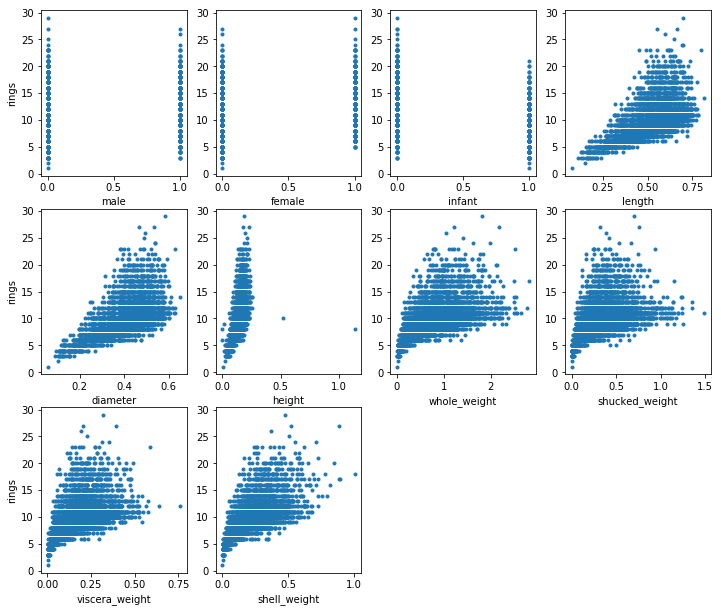

In [45]:
#plot diagrams describing the relationship between each feature and the output
plt.figure(figsize = (12,14))
for i in range(X1.shape[1]):
    plt.subplot(4, 4, i+1)
    plt.plot(X1[:,i], T1[:,0],'.')
    plt.ylabel('' if i%4 else tname_1[0])
    plt.xlabel(xnames_1[i])

**Analysis:<br />**
As is shown from the graph, we can get several lines of information.
1. Not surprisingly, the number of rings in infants are lower than those in adults.
2. Almost every parameter has a relatively positive correlation with the number of rings.
3. The relationship between height and ring number is obscure, therefore it is probably difficult to predict ring number/age with height.

Before classification, we need to divide the data into training and validation parts. A function is defined to implement this partition. 

In [11]:
def part_zy(X, T, nFolds = 5, shuffle = True):
    '''
    This function seperates the data into training and validation data. Default is 5-fold with shuffling.
    '''
     # Randomly arrange row indices
    rowIndices = np.arange(X.shape[0])
    if shuffle:
        np.random.shuffle(rowIndices)
    # Calculate number of samples in each of the nFolds folds
    nSamples = X.shape[0]
    nEach = int(nSamples / nFolds)
    if nEach == 0:
        raise ValueError("partitionKFolds: Number of samples in each fold is 0.")
    # Calculate the starting and stopping row index for each fold.
    # Store in startsStops as list of (start,stop) pairs
    starts = np.arange(0,nEach*nFolds,nEach)
    stops = starts + nEach
    stops[-1] = nSamples
    startsStops = list(zip(starts,stops))
    for valfold in range(nFolds):
        trainfold = np.setdiff1d(range(nFolds), [valfold])
        train_row = []
        for tf in trainfold:
            a, b = startsStops[tf]
            train_row += rowIndices[a:b].tolist()
        X_train = X[train_row, :]
        T_train = T[train_row, :]

        a, b = startsStops[valfold]
        val_row = rowIndices[a:b].tolist()
        X_val = X[val_row, :]
        T_val = T[val_row, :]
        
        yield (X_train, T_train, X_val, T_val)

### Classify abalone ring number/age

First thing is to find out how many classes there are in the output. 

In [12]:
classes1 = np.unique(T1)
print(classes1)

[  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.  15.
  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  29.]


There are 29 classes in the output. Next step is to find out how many samples exist for each class.

In [13]:
for i in classes1:
    print(i, ": ", sum(T1==i))

1.0 :  [1]
2.0 :  [1]
3.0 :  [15]
4.0 :  [57]
5.0 :  [115]
6.0 :  [259]
7.0 :  [391]
8.0 :  [568]
9.0 :  [689]
10.0 :  [634]
11.0 :  [487]
12.0 :  [267]
13.0 :  [203]
14.0 :  [126]
15.0 :  [103]
16.0 :  [67]
17.0 :  [58]
18.0 :  [42]
19.0 :  [32]
20.0 :  [26]
21.0 :  [14]
22.0 :  [6]
23.0 :  [9]
24.0 :  [2]
25.0 :  [1]
26.0 :  [1]
27.0 :  [2]
29.0 :  [1]


Because some of classes, such as 1, 2, 25, 27 and 29, have very low number of instances, it will be difficult for training samples to get more than 1 sample for these classes. Therefore data is updated to group classes with low number of samples, introducing two new classes: <=3 (named as 3) and >=22 (named as 22).

In [14]:
T1[T1==1] = 3
T1[T1==2] = 3
for i in range(23,30):
    T1[T1==i] = 22
classes1 = classes1[2:22]
print('3:  ', sum(T1 == 3))
print('22: ',sum(T1 == 22))
print(classes1)

3:   [17]
22:  [22]
[  3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.  15.  16.  17.
  18.  19.  20.  21.  22.]


In [49]:
# LDA and LLR
perc_lda_1 = []
perc_llr_1 = []
for X_train, T_train, X_val, T_val in part_zy(X1, T1):
    #Linear Discriminant Analysis
    model_lda_1 = trainLDA(X_train, T_train)
    perc_lda_1.append(evaluateLDA(model_lda_1, X_val, T_val))
    #Linear Logistic Regression
    model_llr_1 = trainNN(X_train, T_train, [[0],2000])
    perc_llr_1.append(evaluateNN(model_llr_1, X_val, T_val))
    
print(perc_lda_1)
print(perc_llr_1)

/home/jason/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:101: RuntimeWarning: invalid value encountered in log


[24.67065868263473, 24.550898203592812, 20.0, 22.874251497005986, 22.102747909199522]
[29.58083832335329, 26.22754491017964, 25.868263473053894, 26.82634730538922, 28.673835125448026]


Apparently the prediction is not very accurate with either method, although LLR is slightly better than LDA. We can examine the parameters to see how the data was modeled by LDA and LLR.

In [79]:
#Examining the mu in LDA model
print(xnames_1)
for i in range(len(model_lda_1.classes)):
    print(model_lda_1.classes[i],':')
    print(model_lda_1.mu[i].flatten())

['male', 'female', 'infant', 'length', 'diameter', 'height', 'whole_weight', 'shucked_weight', 'viscera_weight', 'shell_weight']
3.0 :
[-0.589  -0.6776  1.2746 -3.0141 -2.9075 -2.452  -1.6464 -1.5816 -1.5979
 -1.6693]
4.0 :
[-0.5178 -0.6776  1.2016 -2.5413 -2.498  -2.0221 -1.5753 -1.5164 -1.5306
 -1.5996]
5.0 :
[-0.5432 -0.6066  1.1573 -1.992  -1.9963 -1.6611 -1.4417 -1.3636 -1.4015
 -1.4601]
6.0 :
[-0.5123 -0.5245  1.0443 -1.2922 -1.3066 -1.1338 -1.1384 -1.0686 -1.1179
 -1.1594]
7.0 :
[-0.3166 -0.4437  0.7638 -0.8402 -0.857  -0.7928 -0.8702 -0.7854 -0.8551
 -0.9103]
8.0 :
[-0.1432 -0.2204  0.365  -0.1983 -0.2224 -0.2358 -0.37   -0.2796 -0.3699
 -0.4186]
9.0 :
[ 0.0759  0.0729 -0.1499  0.2094  0.1911  0.0999  0.0694  0.1514  0.0815
  0.0097]
10.0 :
[ 0.2287  0.1516 -0.3844  0.4187  0.4107  0.3318  0.3734  0.4021  0.3986
  0.3163]
11.0 :
[ 0.1756  0.2148 -0.3927  0.6242  0.6273  0.5121  0.6323  0.6327  0.6434
  0.5885]
12.0 :
[ 0.1572  0.4099 -0.567   0.5742  0.5923  0.5496  0.6065  0.5

We can see the different mu values for each attribute and each class. Although the final result is not optimal, this model seems to be able to seperate the means of each class.

Next I try neural network with different parameters.

In [52]:
perc_nn_1_1 = []
for X_train, T_train, X_val, T_val in part_zy(X1, T1):
    #Neural network logistic regression
    model_nn_1_1 = trainNN(X_train, T_train, [[10],1500])
    perc_nn_1_1.append(evaluateNN(model_nn_1_1, X_val, T_val))

print(perc_nn_1_1)

[25.62874251497006, 27.18562874251497, 26.706586826347305, 29.46107784431138, 23.894862604540023]


A simple neural network with one single hidden layer of 10 units did not seem to greatly increase the predication correctness. Next I try different parameters with neural network to see if any will work better at classification.

In [53]:
perc_nn_1_2 = [[],[]]
model_nn_1_2 = [0,0]
par_set = [[[10,10],1500], [[10, 10, 10],1500]]
for X_train, T_train, X_val, T_val in part_zy(X1, T1):
    #Neural network logistic regression
    for i in range(len(par_set)):
        model_nn_1_2[i] = trainNN(X_train, T_train, par_set[i])
        perc_nn_1_2[i].append(evaluateNN(model_nn_1_2[i], X_val, T_val))

print(perc_nn_1_2)

[[27.904191616766465, 27.18562874251497, 25.389221556886227, 25.748502994011975, 24.492234169653525], [24.790419161676645, 26.586826347305387, 24.191616766467067, 26.586826347305387, 24.850657108721624]]


Adding more hidden layers did not improve the prediction very much, but we can try increasing the number of iterations to see if we can achieve better results. I choose 1 hidden layer with 10 units as the model to prevent overfitting.

In [15]:
perc_nn_1_3 = []
for X_train, T_train, X_val, T_val in part_zy(X1, T1):
    #Neural network logistic regression
    model_nn_1_3 = trainNN(X_train, T_train, [[10],3000])
    perc_nn_1_3.append(evaluateNN(model_nn_1_3, X_val, T_val))

print(perc_nn_1_3)

[28.982035928143713, 28.74251497005988, 29.58083832335329, 26.82634730538922, 23.536439665471924]


Adding more iterations improved the accuracy. Next I analyze the neural network logistic regression (perc_nn_1_3) from several aspects, including looking at the likelihood with iterations, layer matrix and the confusion matrix.

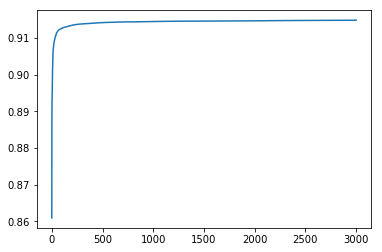

In [16]:
plt.plot(np.exp(-model_nn_1_3.getErrorTrace()))

1.42799938194 0.000121014965254 260.145681582


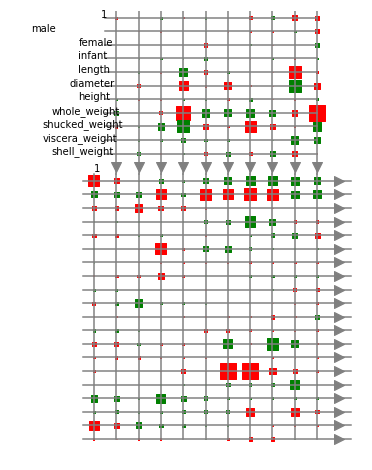

In [17]:
plt.figure(figsize=(6,8))
model_nn_1_3.draw(inputNames = xnames_1)

Based on the graph, the hidden nodes are almost negatively related with class 3, 6, and 19, but positively associated with 17. 

In [32]:
Ptest_1,Prtest_1,_= model_nn_1_3.use(X1,allOutputs=True)
ml.printConfusionMatrix( ml.confusionMatrix(T1,Ptest_1,classes1), classes1)

       3    4    5    6    7    8    9   10   11   12   13   14   15   16   17   18   19   20   21   22
    ------------------------------------------------------------------------------------------------------------------------
 3 | 41.2 47.1 11.8  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0     (17 / 17)
 4 |  3.5 56.1 29.8  8.8  1.8  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0     (57 / 57)
 5 |  0   13.0 32.2 40.0 14.8  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0     (115 / 115)
 6 |  0    2.7  6.9 37.8 39.8  6.6  5.0  0.4  0.4  0    0.4  0    0    0    0    0    0    0    0    0     (259 / 259)
 7 |  0    0    2.6 16.4 46.3 22.8  9.2  1.3  0.5  0.8  0.3  0    0    0    0    0    0    0    0    0     (391 / 391)
 8 |  0    0.2  0.2  4.8 17.3 37.0 28.7  8.8  0.9  1.6  0.5  0    0.2  0    0    0    0    0    0    0     (568 / 568)
 9 |  0    0    0.1  0.7  5.5 18.3 45.3 20.2  5.2  3.2  0.9  

Based on the confusion matrix, this neural network is able to predict ring numbers when they are small. When the ring number is equal to or larger than 12, the predication capability decreases very rapidly. The problem of very low accuracy may be because two reasons. First, there are too many classes and it is difficult to find a linear or non-linear seperable model to predict the results. Second, some of classes, such as those larger than 16, have too few samples/instances. Therefore It can be difficult to make a precise prediction since the number of parameters in a neural network is much higher than the number of feature space. 

In summary, non-linear logistic regression (neural network with 1 hidden layer of 10 units) works best on this dataset, and LLR is a little worse than non-linear logistic regression. Both of them are better than LDA. This seems to be a difficult problem, and one may try to group some the classes together to achieve higher predicability. Another way is to increase the number of samples.

## Data #2: Cardiotocograms
### Description

Data is acquired from UCI:http://archive.ics.uci.edu/ml/machine-learning-databases/00193/CTG.xls 

2126 fetal cardiotocograms (CTGs) were automatically processed and the respective diagnostic features measured. The CTGs were also classified by three expert obstetricians and a consensus classification label assigned to each of them. Classification was both with respect to a morphologic pattern (A, B, C. ...) and to a fetal state (N, S, P). Therefore the dataset can be used either for 10-class or 3-class experiments. Here I tested 10-class classficiation with LDA, LLR, and non-linear logistic regression.

### Attribute Information:
There are 23 attributes, 2 are output and 21 are input features. Their names and meanings are the following:


LB - FHR baseline (beats per minute)<br />
AC - # of accelerations per second<br />
FM - # of fetal movements per second<br />
UC - # of uterine contractions per second<br />
DL - # of light decelerations per second<br />
DS - # of severe decelerations per second<br />
DP - # of prolongued decelerations per second<br />
ASTV - percentage of time with abnormal short term variability<br />
MSTV - mean value of short term variability<br />
ALTV - percentage of time with abnormal long term variability<br />
MLTV - mean value of long term variability<br />
Width - width of FHR histogram<br />
Min - minimum of FHR histogram<br />
Max - Maximum of FHR histogram<br />
Nmax - # of histogram peaks<br />
Nzeros - # of histogram zeros<br />
Mode - histogram mode<br />
Mean - histogram mean<br />
Median - histogram median<br />
Variance - histogram variance<br />
Tendency - histogram tendency<br />
CLASS - FHR pattern class code (1 to 10)<br />
NSP - fetal state class code (N=normal; S=suspect; P=pathologic)<br />


In [1]:
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/00193/CTG.xls

--2017-04-03 13:47:35--  http://archive.ics.uci.edu/ml/machine-learning-databases/00193/CTG.xls
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.249
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.249|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1743872 (1.7M) [application/vnd.ms-excel]
Saving to: ‘CTG.xls’

100%[======================================>] 1,743,872   1.15MB/s   in 1.4s   

2017-04-03 13:47:37 (1.15 MB/s) - ‘CTG.xls’ saved [1743872/1743872]



This is an excel file with 3 sheets. The sheet named as "Data" contains all the data we need with some extra information. Here I use pandas to read the excel file. 

In [18]:
import pandas as pd

In [19]:
raw_data = pd.read_excel('CTG.xls', sheetname = 'Data', skiprows = 1, parse_cols = 'K:AE,AR,AT')

In [20]:
data = raw_data.as_matrix()[:-3,:]
print(data.shape)
names = ['LB','AC','FM','UC','DL','DS',
         'DP','ASTV','MSTV','ALTV','MLTV',
         'Width','Min','Max','Nmax','Nzeros',
         'Mode','Mean','Median','Variance','Tendency',
         'CLASS', 'NSP']

(2126, 23)


In [21]:
# Seperating input and output
X2 = data[:, :-2]
T2 = data[:, -2:-1]
xnames_2 = names[:-2]
tname_2 = ['CLASS']
print(X2.shape)
print(T2.shape)

(2126, 21)
(2126, 1)


Fist we plot the data to observe some potential relationship. 

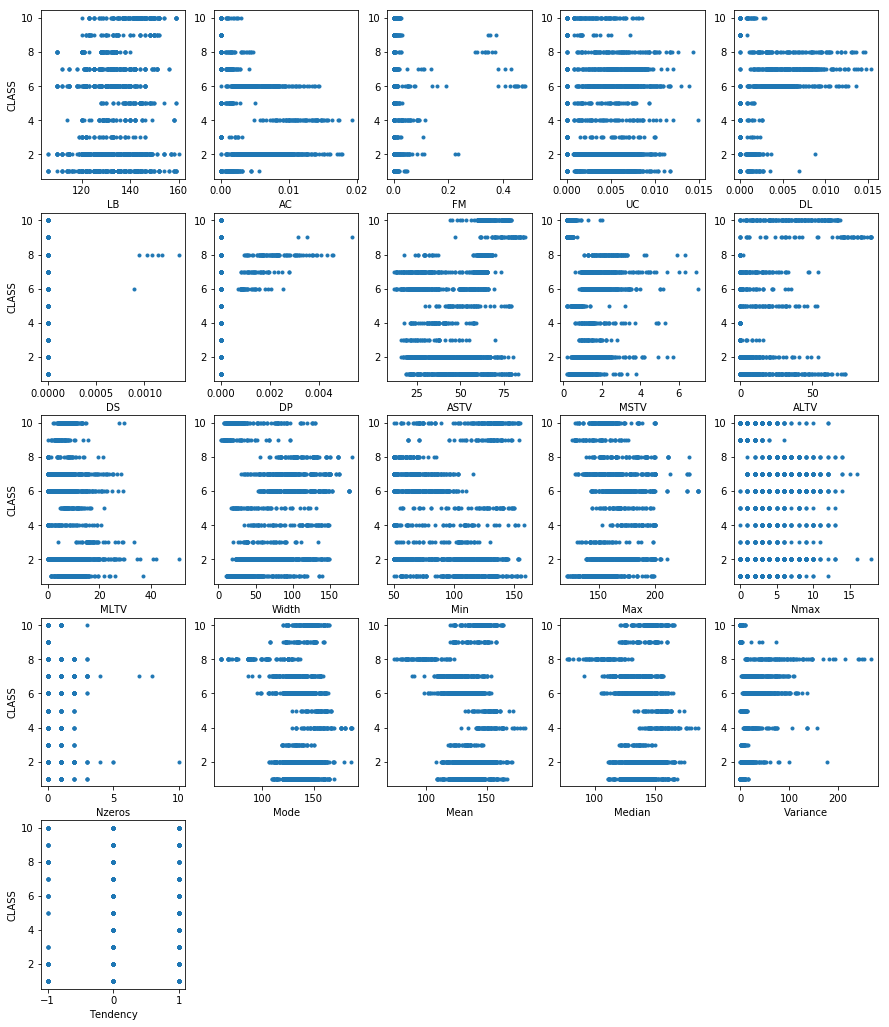

In [67]:
#plot diagrams describing the relationship between each feature and the output
plt.figure(figsize = (15,18))
for i in range(X2.shape[1]):
    plt.subplot(5, 5, i+1)
    plt.plot(X2[:,i], T2[:,0],'.')
    plt.ylabel('' if i%5 else tname_2[0])
    plt.xlabel(xnames_2[i])

**Analysis:<br />**
Several attributes seem to have a correlation with the output classes. For exmaple, higher DP only appear in class 6-9, and lower histogram median is associated with class 8. Some of the features do not seem to be very important in terms of classificaiton such as Nzeros.

### Classify cardiotocograms data

First thing is to find out how many classes there are in the output. 

In [22]:
classes_2 = np.unique(T2)
print(classes_2)

[  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.]


As mentioned before, there are 10 classes in the output. Next step is to find out how many samples exist for each class.

In [23]:
for i in classes_2:
    print(i, ": ", sum(T2==i))

1.0 :  [384]
2.0 :  [579]
3.0 :  [53]
4.0 :  [81]
5.0 :  [72]
6.0 :  [332]
7.0 :  [252]
8.0 :  [107]
9.0 :  [69]
10.0 :  [197]


In [36]:
# LDA and LLR
perc_lda_2 = []
perc_llr_2 = []
for X_train, T_train, X_val, T_val in part_zy(X2, T2):
    #Linear Discriminant Analysis
    model_lda_2 = trainLDA(X_train, T_train)
    perc_lda_2.append(evaluateLDA(model_lda_2, X_val, T_val))
    #Linear Logistic Regression
    model_llr_2 = trainNN(X_train, T_train, [[0],2000])
    perc_llr_2.append(evaluateNN(model_llr_2, X_val, T_val))
    
print(perc_lda_2)
print(perc_llr_2)

/home/jason/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:101: RuntimeWarning: invalid value encountered in log


[73.41176470588235, 67.29411764705883, 69.17647058823529, 67.76470588235294, 66.90140845070422]
[80.47058823529412, 81.64705882352942, 80.47058823529412, 79.05882352941175, 83.09859154929578]


LLR is much better than LDA in terms of the prediction. We can examine the parameters to see how the data was modeled by LDA and LLR.

In [80]:
#Examining the mu for each class in the LDA model
print(xnames_2)
for i in range(len(model_lda_2.classes)):
    print(model_lda_2.classes[i],':')
    print(model_lda_2.mu[i].flatten())

['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV', 'MLTV', 'Width', 'Min', 'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean', 'Median', 'Variance', 'Tendency']
1.0 :
[-0.0288 -0.6999 -0.1619 -0.0613 -0.5747 -0.059  -0.2665  0.132  -0.5296
  0.2612  0.1951 -0.7699  0.5947 -0.6907 -0.6087 -0.228  -0.0469  0.0554
 -0.0453 -0.5787 -0.1183]
2.0 :
[-0.0912  0.825  -0.1182  0.0179 -0.5454 -0.059  -0.2665 -0.2317 -0.0881
 -0.4087  0.1676 -0.0662  0.1793  0.1511 -0.1155 -0.1769  0.1331  0.3198
  0.2014 -0.3149 -0.1944]
3.0 :
[-0.312  -0.7309 -0.0743 -0.2656 -0.5605 -0.059  -0.2665 -0.876   0.1609
 -0.4547  1.66   -0.2045 -0.058  -0.5382 -0.0501  0.1313 -0.2517 -0.1646
 -0.2754 -0.4693  0.223 ]
4.0 :
[ 0.0254  2.1094  0.2873  0.1141 -0.558  -0.059  -0.2665 -0.5742  0.4763
 -0.5386 -0.5139  0.6297 -0.2213  1.0003  0.5101  0.0419  1.3039  1.2275
  1.3199  0.5221  0.6159]
5.0 :
[ 0.8124 -0.6609 -0.1344 -0.2451 -0.5975 -0.059  -0.2665  0.3781 -0.6515
  0.4211  0.2815 -0.417   0.7317  0.2986  0

Next I try neural network with different parameters.

In [69]:
perc_nn_2_1 = []
for X_train, T_train, X_val, T_val in part_zy(X2, T2):
    #Neural network logistic regression
    model_nn_2_1 = trainNN(X_train, T_train, [[10],1500])
    perc_nn_2_1.append(evaluateNN(model_nn_2_1, X_val, T_val))

print(perc_nn_2_1)

[81.64705882352942, 79.29411764705883, 80.0, 75.29411764705883, 80.75117370892019]


A simple neural network with one single hidden layer of 10 units did not seems to improve the predication compared with LLR. Next I try different parameters with neural network to see if any will work better at classification.

In [66]:
perc_nn_2_2 = [[],[]]
model_nn_2_2 = [0,0]
par_set = [[[10,10],1500], [[10, 10, 10],1500]]
for X_train, T_train, X_val, T_val in part_zy(X2, T2):
    #Neural network logistic regression
    for i in range(len(par_set)):
        model_nn_2_2[i] = trainNN(X_train, T_train, par_set[i])
        perc_nn_2_2[i].append(evaluateNN(model_nn_2_2[i], X_val, T_val))

print(perc_nn_2_2)

[[77.17647058823529, 82.11764705882352, 80.47058823529412, 75.52941176470588, 76.76056338028168], [75.76470588235294, 81.64705882352942, 80.94117647058823, 78.58823529411765, 78.40375586854461]]


Adding more hidden layers did not improve the prediction very much, but we can try increasing the number of iterations to see if we can achieve better results. I choose 1 hidden layer as the model to prevent overfitting.

In [24]:
perc_nn_2_3 = []
for X_train, T_train, X_val, T_val in part_zy(X2, T2):
    #Neural network logistic regression
    model_nn_2_3 = trainNN(X_train, T_train, [[10],3000])
    perc_nn_2_3.append(evaluateNN(model_nn_2_3, X_val, T_val))

print(perc_nn_2_3)

[81.64705882352942, 83.05882352941177, 77.88235294117646, 78.58823529411765, 81.2206572769953]


Next I analyze the neural network logistic regression (perc_nn_1_3) from several aspects, including looking at the likelihood with iterations, layer matrix and the confusion matrix.

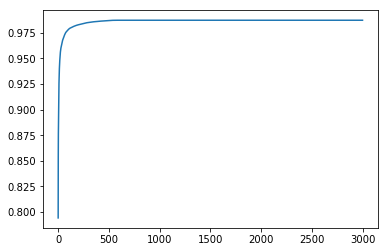

In [25]:
plt.plot(np.exp(-model_nn_2_3.getErrorTrace()))

1.58320906867 8.88684399077e-05 244.140625


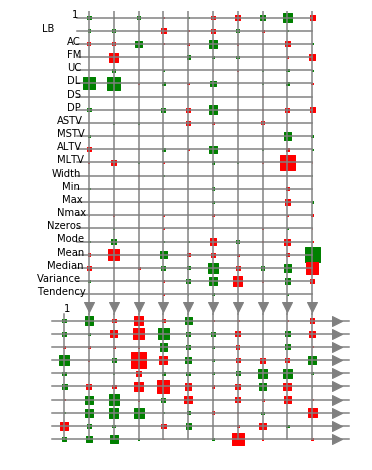

In [26]:
plt.figure(figsize=(6,8))
model_nn_2_3.draw(inputNames = xnames_2)

Some of the attributes, such as width and Nzeros, do not seem to have important roles in the prediction. On the contrary, some features, such as Dl, Mean and Variance,are closely associated with the prediction by involving in the values of several hidden nodes with a high weight. 

In [34]:
Ptest_2,Prtest_2,_= model_nn_2_3.use(X2,allOutputs=True)
ml.printConfusionMatrix( ml.confusionMatrix(T2,Ptest_2,classes_2), classes_2)

       1    2    3    4    5    6    7    8    9   10
    ------------------------------------------------------------
 1 | 88.5  3.1  2.9  0    0.3  0.3  1.0  0    0    3.9   (384 / 384)
 2 |  2.2 94.3  0.3  0.7  1.0  1.0  0.2  0    0    0.2   (579 / 579)
 3 | 18.9  3.8 75.5  0    1.9  0    0    0    0    0     (53 / 53)
 4 |  0    6.2  0   93.8  0    0    0    0    0    0     (81 / 81)
 5 | 11.1  1.4  0    1.4 81.9  0    0    0    0    4.2   (72 / 72)
 6 |  0.6  3.0  0    0.3  0   93.1  2.4  0.6  0    0     (332 / 332)
 7 |  1.2  0.4  0    0    0    2.0 95.6  0.4  0    0.4   (252 / 252)
 8 |  0    0    0    0    0    0    0.9 99.1  0    0     (107 / 107)
 9 |  0    0    0    0    0    0    0    0   91.3  8.7   (69 / 69)
10 |  5.6  0.5  0    0    0    0    0    0    2.0 91.9   (197 / 197)
       1    2    3    4    5    6    7    8    9   10
    ------------------------------------------------------------
 1 | 88.5  3.1  2.9  0    0.3  0.3  1.0  0    0    3.9   (384 / 384)
 2 |  2.2 9

Overall, the neural network logistic model predicts the results well. The only confusion the model has is with the first a few clases, especially with class 3. This is not surprising considering that there are only 53 samples in class 3. Therefore increasing the number of samples may improve prediction accuracy. 

In summary, LLR is a slightly better model than non-linear logistic regression, and both of them perform better than LDA.

## Results

In this section, we will be looking for

* clear explanations of each function;
* experiments with two different data sets with descriptions of the data;
* discussion of each result, including
  * accuracies as percent correctly classified,
  * best parameter values,
  * some analysis of each classification algorithm and how it is classifying the data by examining the $\mu$ values for LDA, and the first layer's weight values for the neural networks;
* and discuss which algorithm works best for each data set.

## Grading

Your notebook will be run and graded automatically. Download [A4grader.tar](http://www.cs.colostate.edu/~anderson/cs480/notebooks/A4grader.tar)  and extract A4grader.py from it. Run the code in the following cell to demonstrate an example grading session. You should see a perfect score of 80/100 if your functions are defined correctly. 

The remaining 20% will be based on your writing.  Be sure to explain each function, and details of the results summarized in the above section. 

In [38]:
%run -i A4grader.py


   Testing   model = trainLDA(X,T)
             accuracy = evaluateLDA(model,X,T)

20/20 points. Accuracy is within 10 of correct value 50%

   Testing   model = trainNN(X,T, [[5],100])
             accuracy = evaluateNN(model,X,T)

30/30 points. Accuracy is within 10 of correct value 100%

  Testing
    resultsNN = ml.trainValidateTestKFoldsClassification( trainNN,evaluateNN, X,T, 
                                                          [ [ [0], 5], [ [10], 100] ],
                                                          nFolds=3, shuffle=False,verbose=False)
    bestParms = [row[0] for row in resultsNN]


30/30 points. You correctly find the best parameters to be [[10],100] for each fold.

A4 CODING GRADE is 80/80

A4 WRITING GRADE is ??/20

A4 FINAL GRADE is ??/100

Remember, this python script is just an example of how your code will be graded.
Do not be satisfied with an 80% from running this script.  Write and run additional
tests of your own design.
